In [57]:
import numpy as np
import proplot as pplt
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path
import string

In [58]:


def parse_t_file(filepath):
    """Parses the T file, correctly handling the structure."""
    with open(filepath, 'r') as file:
        lines = file.readlines()
    
    # Filter out metadata lines and empty lines
    data_lines = [line for line in lines if not line.startswith('#') and line.strip()]
    
    # Assuming the actual data starts immediately after metadata
    if not data_lines:
        raise ValueError("No data found in the file.")
    
    # The first non-metadata line contains the 'Time' header and the rest are probe data
    # In the given file structure, 'Time' is part of the data lines, not separate
    time_data_line = data_lines[0].strip().split()
    time = float(time_data_line[0])  # The first value is time
    
    # Probe values start from the second element
    data = [np.nan if value == '-1e+300' else float(value) for value in time_data_line[1:]]
    
    # Create a DataFrame
    # Generating a list of probe names based on the number of data points
    probes = [f"Probe {i}" for i in range(len(data))]
    df = pd.DataFrame([data], columns=probes)
    df.insert(0, 'Time', time)
    
    return df.values[0][1:]

# # Example usage:
# if __name__ == "__main__":
#     filepath = "/Users/patrickkastner/Dropbox (GaTech)/Students/MaryamIndependentStudy/Cases/240329_Case_4/Case/postProcessing/probingLine2/Brick/4760/T"
#     df = parse_t_file(filepath)
#     print(df)


In [59]:


def get_latest_time_data(postprocessing_dir):
    """Collects the latest time step data for each material."""
    materials_data = {}
    for material in os.listdir(postprocessing_dir):
        lines_path = os.path.join(postprocessing_dir, material)
        #print(lines_path)
        if not os.path.isdir(lines_path):
            continue  # Skip files

        for line in os.listdir(lines_path):
            material_path = os.path.join(lines_path, line)
            #print(material_path)

            if not os.path.isdir(material_path):
                continue  # Skip files


            # Find the latest time step for the material
            time_steps = [int(folder) for folder in os.listdir(material_path) if folder.isdigit()]
            #print(time_steps)
            if not time_steps:
                continue  # Skip if no time steps found
            latest_time_step = max(time_steps)
            print(latest_time_step)

            # # Read the 'T' file for the latest time step
            t_file_path = os.path.join(material_path, str(latest_time_step), 'T')
            #print(t_file_path)
            if os.path.exists(t_file_path):
                try:    
                 materials_data[material+"-"+line] = parse_t_file(t_file_path)  # Adjust if format differs
                except:
                    pass

    return materials_data

def plot_material_data(materials_data, validation_data):
    """Plots data for each material against the validation data."""
    for material, data in materials_data.items():
        plt.figure(figsize=(10, 6))

        # Assuming the data file contains columns that need to be named or identified
        data.columns = ['X', 'Y']  # Rename columns as per the actual data structure
        plt.plot(data['X'], data['Y'], label=f'{material} Results')

        plt.plot(validation_data['X'], validation_data['Y'], label='Validation Data', linestyle='--')
        
        plt.xlabel('X Axis Label')  # Adjust label
        plt.ylabel('Y Axis Label')  # Adjust label
        plt.title(f'{material} Results vs. Validation Data')
        plt.legend()
        plt.show()


postprocessing_dir = Path.cwd() / "Case" / "postProcessing" # Adjust this path
materials_data = get_latest_time_data(postprocessing_dir)


    
materials_data = {key: np.where(np.isnan(value), np.nan, value - 273.15) for key, value in materials_data.items()}

materials_data

6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840
6840


{'probingLine3-IntairTop': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan]),
 'probingLine3-ConcreteTop': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan]),
 'probingLine3-ConcreteBottom': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan]),
 'probingLine3-ExtAirBottom': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan]),
 'probingLine3-Slab': array([5.267, 5.257, 5.248, 5.24 , 5.232, 5.224, 5.216, 5.209, 5.202,
        5.195, 5.188, 5.182, 5.175, 5.169, 5.164]),
 'probingLine3-Insulation': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan]),
 'probingLine3-IntairBottom': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan]),
 'probingLine3-Brick': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan]),
 'probingLine

In [60]:
X_probingLine1 = [
1.15
,1.14
,1.13
,1.12
,1.11
,1.1
,1.09
,1.08
,1.07
,1.06
, 1.05 
, 1.04 
, 1.03 
, 1.02 
, 1.01 
, 1
, 0.99 
, 0.98 
, 0.97 
, 0.96 
, 0.95 
, 0.94 
, 0.93 
, 0.92 
, 0.91 
, 0.9
, 0.89 
, 0.88 
, 0.87 
, 0.86 
, 0.85 
, 0.84 
, 0.83 
, 0.82 
, 0.81 
, 0.8
, 0.79 
, 0.78 
, 0.77 
, 0.76 
, 0.75 
, 0.74 
, 0.73 
, 0.72 
, 0.71 
, 0.7
, 0.69 
, 0.68 
, 0.67 
, 0.66 
, 0.65 
, 0.64 
, 0.63 
, 0.62 
, 0.61 
, 0.6
, 0.59 
, 0.58 
, 0.57 
, 0.56 
, 0.55 
, 0.54 
, 0.53 
, 0.52 
, 0.51 
, 0.5
, 0.49 
, 0.48 
, 0.47 
, 0.46 
, 0.45 
, 0.44 
, 0.43 
, 0.42 
, 0.41 
, 0.4
, 0.39 
, 0.38 
, 0.37 
, 0.36 
, 0.35 
, 0.34 
, 0.33 
, 0.32 
, 0.31 
, 0.3
, 0.29 
, 0.28 
, 0.27 
, 0.26 
, 0.25 
, 0.24 
, 0.23 
, 0.22 
, 0.21 
, 0.2
, 0.19 
, 0.18 
, 0.17 
, 0.16 
,0.15
,0.14
,0.13
,0.12
,0.11
,0.1
,0.09
,0.08
,0.07
,0.06
,0.05
,0.04
,0.03
,0.02
,0.01
,0
,-0.01 
,-0.02 
,-0.03 
,-0.04 
,-0.05 
,-0.06 
,-0.07 
,-0.08 
,-0.09 
,-0.1
,-0.11 
,-0.12 
,-0.13 
,-0.14 
,-0.15 
,-0.16 
,-0.17 
,-0.18 
,-0.19 
,-0.2
,-0.21 
,-0.22 
,-0.23 
,-0.24 
,-0.25 
,-0.26 
,-0.27 
,-0.28 
,-0.29 
,-0.3
,-0.31 
,-0.32 
,-0.33 
,-0.34 
,-0.35 
,-0.36 
,-0.37 
,-0.38 
,-0.39 
,-0.4
,-0.41 
,-0.42 
,-0.43 
,-0.44 
,-0.45 
,-0.46 
,-0.47 
,-0.48 
,-0.49 
,-0.5
,-0.51 
,-0.52 
,-0.53 
,-0.54 
,-0.55 
,-0.56 
,-0.57 
,-0.58 
,-0.59 
,-0.6
,-0.61 
,-0.62 
,-0.63 
,-0.64 
,-0.65 
,-0.66 
,-0.67 
,-0.68 
,-0.69 
,-0.7
,-0.71 
,-0.72 
,-0.73 
,-0.74 
,-0.75 
,-0.76 
,-0.77 
,-0.78 
,-0.79 
,-0.8
,-0.81 
,-0.82 
,-0.83 
,-0.84 
,-0.85 
,-0.86 
,-0.87 
,-0.88 
,-0.89 
,-0.9
,-0.91 
,-0.92 
,-0.93 
,-0.94 
,-0.95 
,-0.96 
,-0.97 
,-0.98 
,-0.99 
,-1

]

In [61]:
X_probingLine2 = [1.9 
,1.89
,1.88
,1.87
,1.86
,1.85
,1.84
,1.83
,1.82
,1.81
,1.8 
,1.79
,1.78
,1.77
,1.76
,1.75
,1.74
,1.73
,1.72
,1.71
,1.7 
,1.69
,1.68
,1.67
,1.66
,1.65
,1.64
,1.63
,1.62
,1.61
,1.6 
,1.59
,1.58
,1.57
,1.56
,1.55
,1.54
,1.53
,1.52
,1.51
,1.5 
,1.49
,1.48
,1.47
,1.46
,1.45
,1.44
,1.43
,1.42
,1.41
,1.4 
,1.39
,1.38
,1.37
,1.36
,1.35
,1.34
,1.33
,1.32
,1.31
,1.3 
,1.29
,1.28
,1.27
,1.26
,1.25
,1.24
,1.23
,1.22
,1.21
,1.2 
,1.19
,1.18
,1.17
,1.16
,1.15
,1.14
,1.13
,1.12
,1.11
,1.1 
,1.09
,1.08
,1.07
,1.06
,1.05
,1.04
,1.03
,1.02
,1.01
,1.0 
,0.99
,0.98
,0.97
,0.96
,0.95
,0.94
,0.93
,0.92
,0.91
,0.9 ]

In [62]:
X_probingLine3 = [
0.899083
,0.889083
,0.879083
,0.869083
,0.859083
,0.849083
,0.839083
,0.829083
,0.819083
,0.809083
,0.799083
,0.789083
,0.779083
,0.769083
,0.759083
]

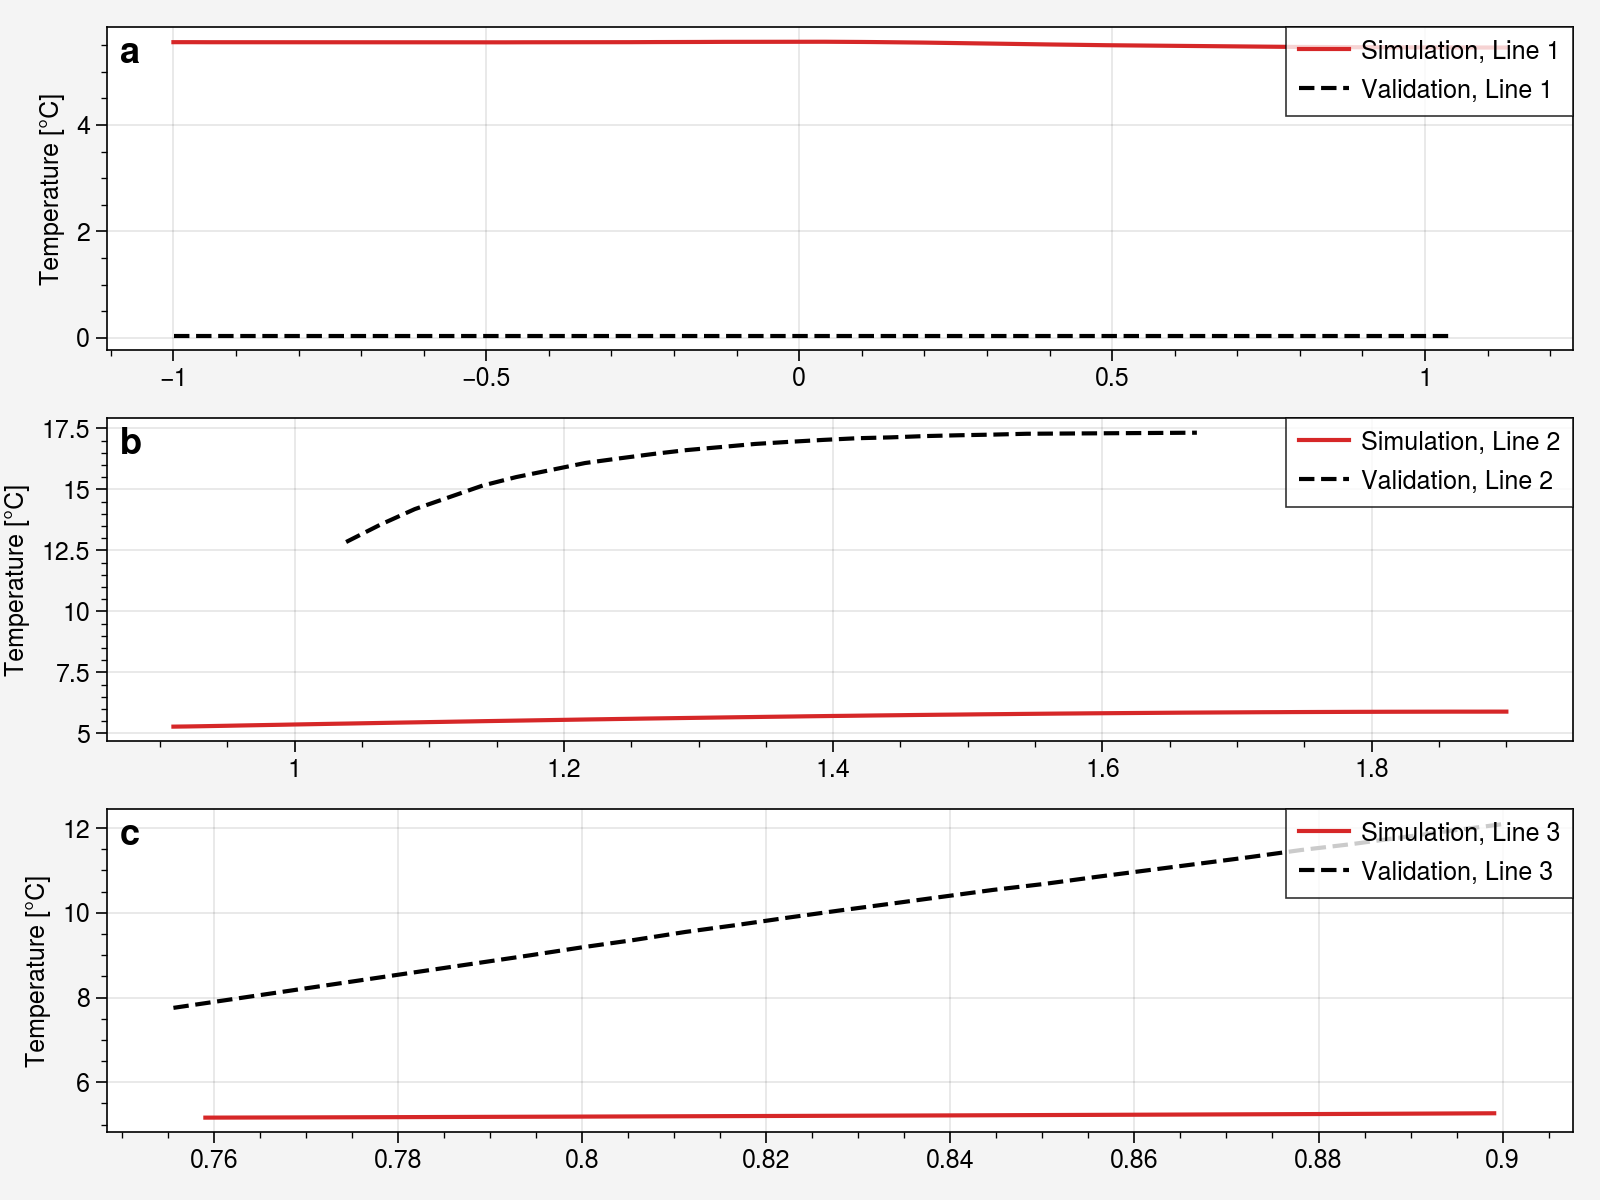

In [63]:
# Assuming validation data is also stored in a CSV file

validation_data_1 = pd.read_csv("QuickfieldTempPlots/Probing1_Insulation.csv", delimiter=',')  # Adjust this path and delimiter
validation_data_1.columns = ['X', 'T']  # Rename columns as per the actual data structure

validation_data_2 = pd.read_csv("QuickfieldTempPlots/Probing2_Slablong.csv", delimiter=',')  # Adjust this path and delimiter
validation_data_2.columns = ['X', 'T']  # Rename columns as per the actual data structure

validation_data_3 = pd.read_csv("QuickfieldTempPlots/Probing3_slabshort.csv", delimiter=',')  # Adjust this path and delimiter
validation_data_3.columns = ['X', 'T']  # Rename columns as per the actual data structure

offset_1 = 1.08
validation_data_1['X'] = [i-offset_1 for i in validation_data_1['X'].values] 

offset_2 = -1
validation_data_2['X'] = [i-offset_2 for i in validation_data_2['X'].values] 

offset_3 = -0.75
validation_data_3['X'] = [i-offset_3 for i in validation_data_3['X'].values] 

fig, axs = plt.subplots(3, 1, figsize=(8,6))  # `sharex=True` makes all subplots share the same x-axis

axs[0].plot(X_probingLine1,materials_data['probingLine1-Insulation'], color ='#d62728' ,  label='Simulation, Line 1')#, linewidth=1)
axs[0].plot(validation_data_1['X'], validation_data_1['T'] ,'--', color = 'black', label='Validation, Line 1', markersize=2)
axs[0].set_ylabel('Temperature [°C]')
axs[0].legend(loc='upper right')
axs[0].grid(True)

axs[1].plot(X_probingLine2,materials_data['probingLine2-Plaster'], color ='#d62728' ,  label='Simulation, Line 2')#, linewidth=1)
axs[1].plot(validation_data_2['X'], validation_data_2['T'] ,'--', color = 'black', label='Validation, Line 2', markersize=2)
axs[1].set_ylabel('Temperature [°C]')
axs[1].legend(loc='upper right')
axs[1].grid(True)

axs[2].plot(X_probingLine3,materials_data['probingLine3-Slab'], color ='#d62728' ,  label='Simulation, Line 3')#, linewidth=1)
axs[2].plot(validation_data_3['X'], validation_data_3['T'] ,'--', color = 'black', label='Validation, Line 3', markersize=2)
axs[2].set_ylabel('Temperature [°C]')
axs[2].legend(loc='upper right')
axs[2].grid(True)

for n, ax in enumerate(axs):

    #ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes  size=10, weight='bold')
    ax.text(0.0088, 0.89, string.ascii_lowercase[n], transform=ax.transAxes,  size=13, weight='bold')

plt.tight_layout()
plt.savefig("Validation.pdf")
plt.savefig("Validation.png")
